In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./Dataset/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

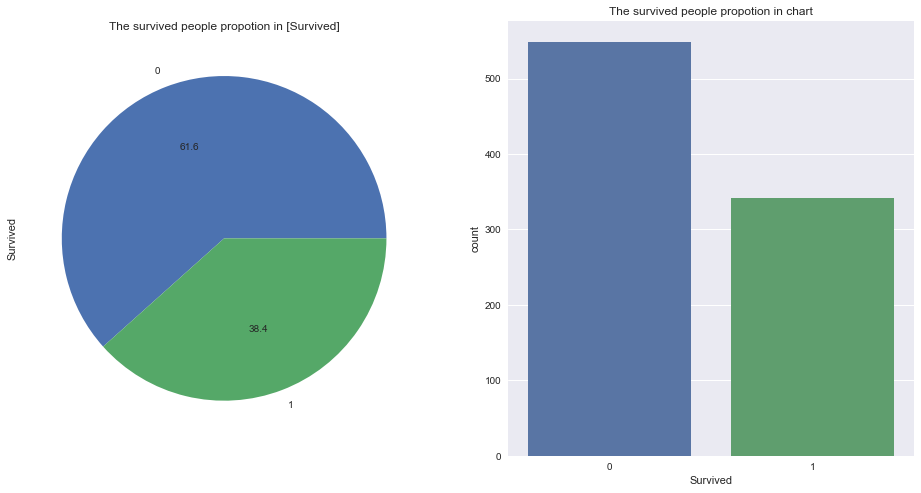

In [6]:
# How many survived?
f, ax = plt.subplots(1,2,figsize=(16,8))
data['Survived'].value_counts().plot.pie(autopct='%.1f', ax=ax[0])
ax[0].set_title('The survived people propotion in [Survived]')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('The survived people propotion in chart')
plt.show()

In [7]:
# Categorical features : Sex, Embarked (Not number, it is word)
# Ordinal features: Pclass (Number, can be divided by few classes)
# Continuous feature: Age (Number, continuous)

In [8]:
data[['Sex', 'Survived']].groupby(['Survived'], as_index=False).count()

,Survived,Sex
0,0,549
1,1,342


In [9]:
data.groupby(['Sex', 'Survived']).count() ## groupby로 해당 Index에 대해서만 정렬

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [10]:
data.groupby(['Sex', 'Survived', 'Pclass'])['Survived'].count()

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

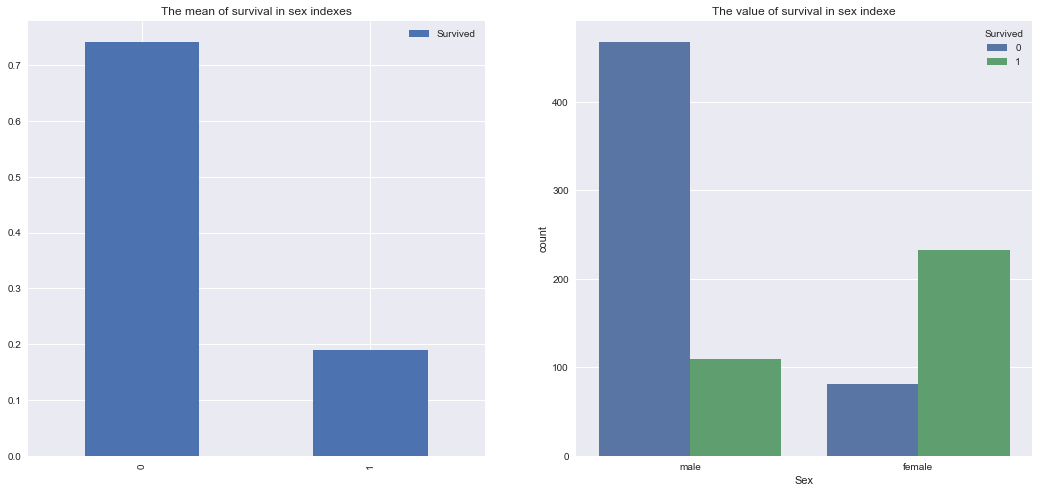

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().plot.bar(ax=ax[0])
ax[0].set_title('The mean of survival in sex indexes')
sns.countplot('Sex', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('The value of survival in sex indexe')
plt.show()

In [12]:
# Sex -> Categorical feature
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

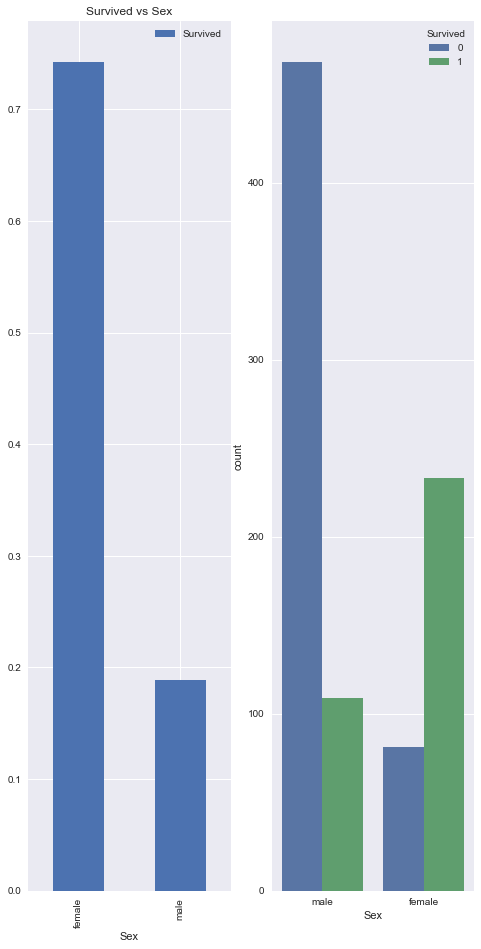

In [13]:
f, ax = plt.subplots(1,2, figsize=(8,16))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
plt.show()

In [14]:
pd.crosstab(data.Pclass, data.Survived,  margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


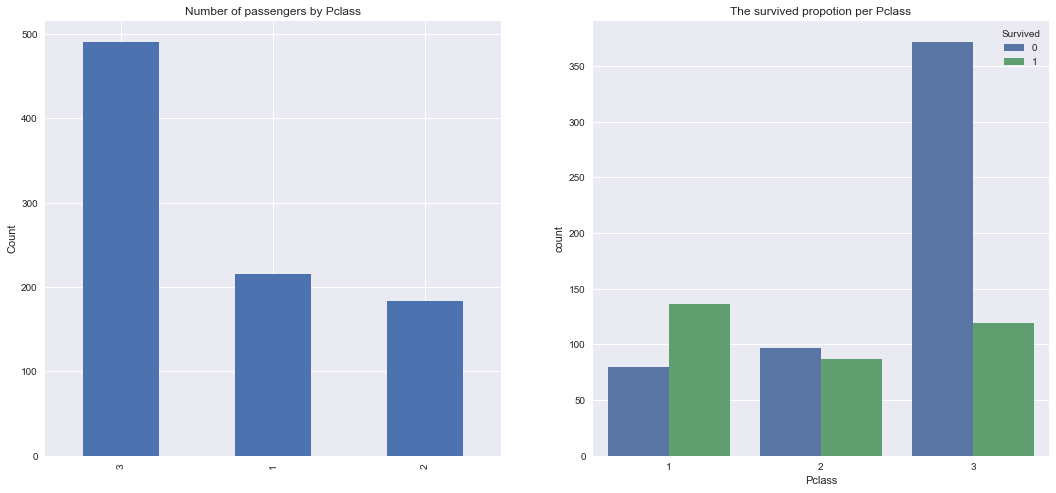

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('The survived propotion per Pclass')
plt.show()

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

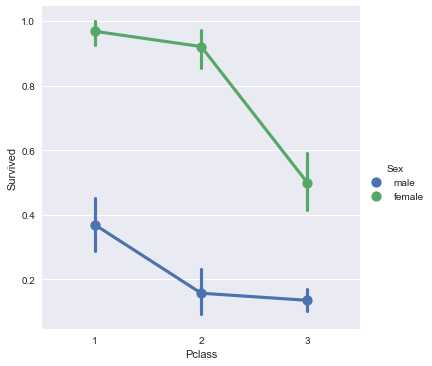

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [18]:
# Age -> continuous feature
print("{:>10} is {:.2f}".format("The oldest passenger", data['Age'].max()))
print("{:>10} is {:.2f}".format("The youngest passenger", data['Age'].min()))
print("{:>10} is {:.2f}".format("The mean age passenger", data['Age'].mean()))

The oldest passenger is 80.00
The youngest passenger is 0.42
The mean age passenger is 29.70


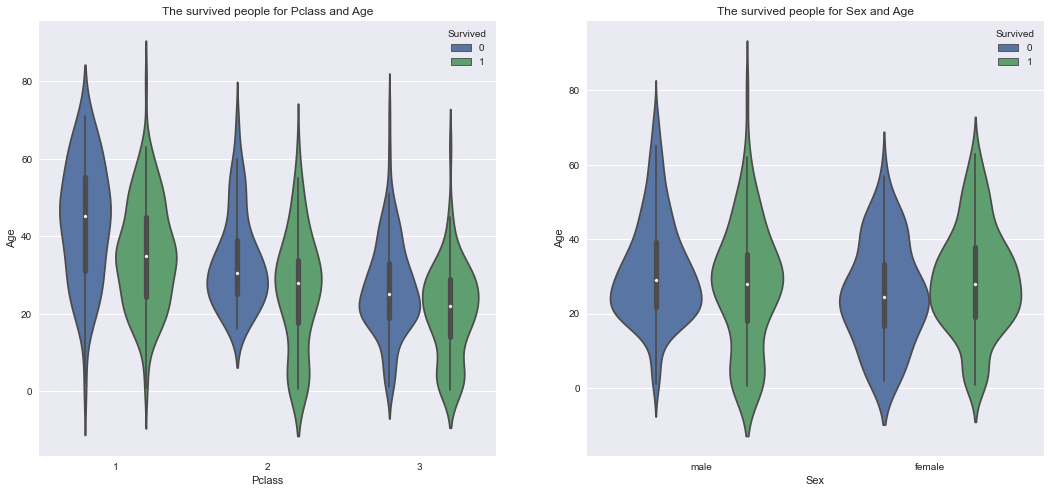

In [19]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, ax=ax[0])
ax[0].set_title('The survived people for Pclass and Age')
sns.violinplot('Sex', 'Age', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('The survived people for Sex and Age')
plt.show()

In [20]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [21]:
pd.crosstab(data.Initial, data.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [25]:
data.Age.isnull().any()

False

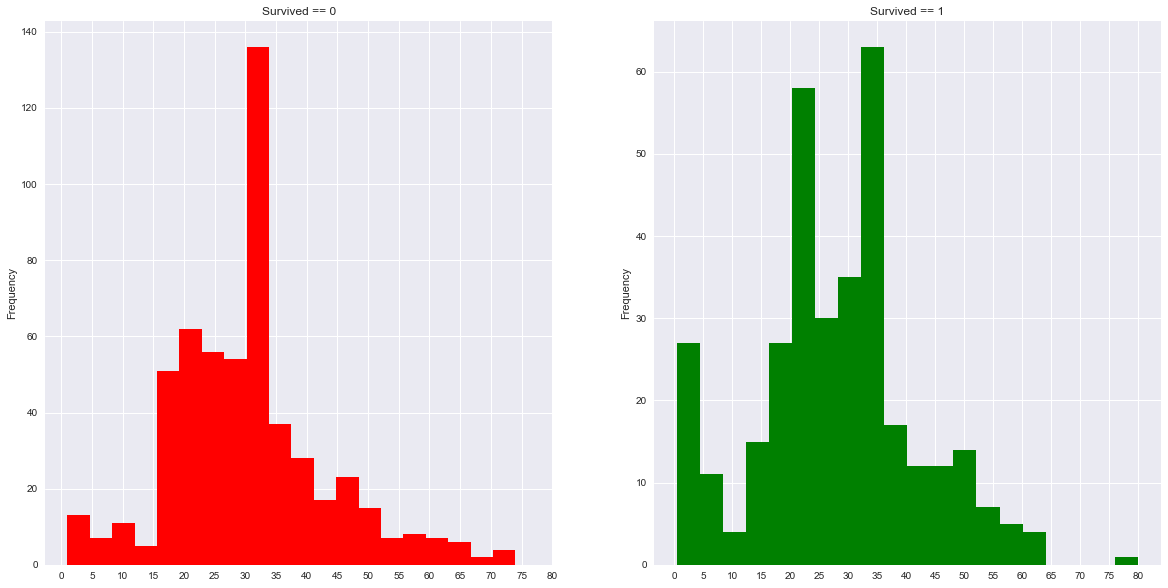

In [26]:
f, ax = plt.subplots(1, 2, figsize = (20,10))
data[data['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, color='red')
ax[0].set_title('Survived == 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1]['Age'].plot.hist(ax=ax[1], bins=20, color='green')
ax[1].set_title('Survived == 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

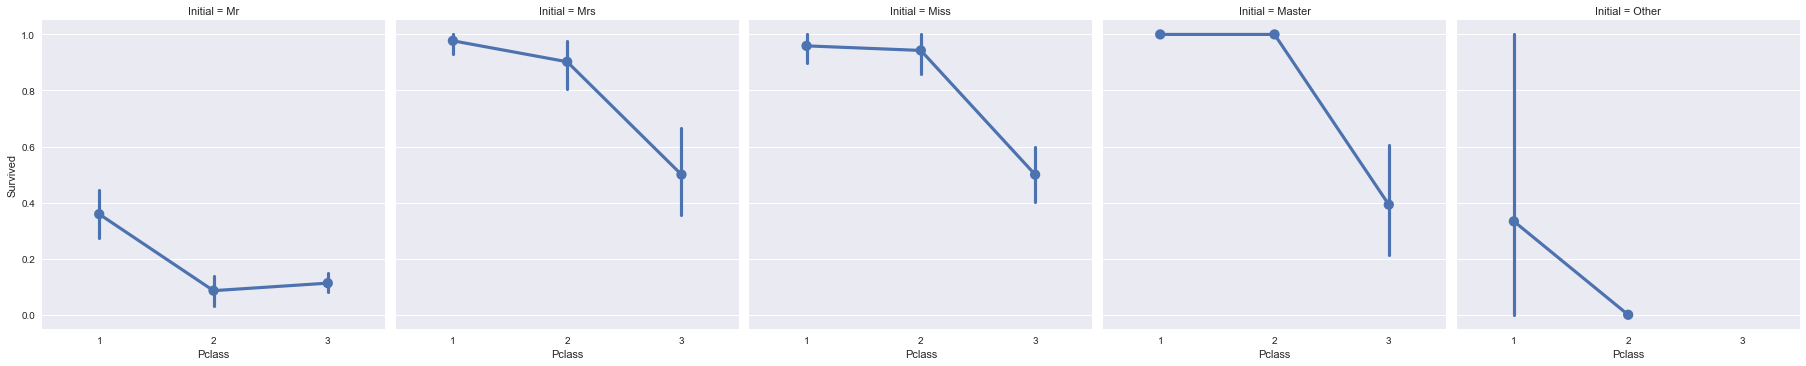

In [27]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [28]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

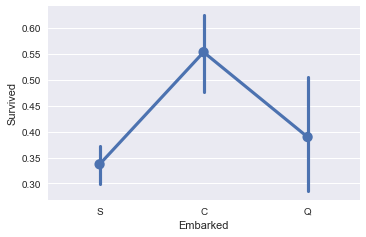

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

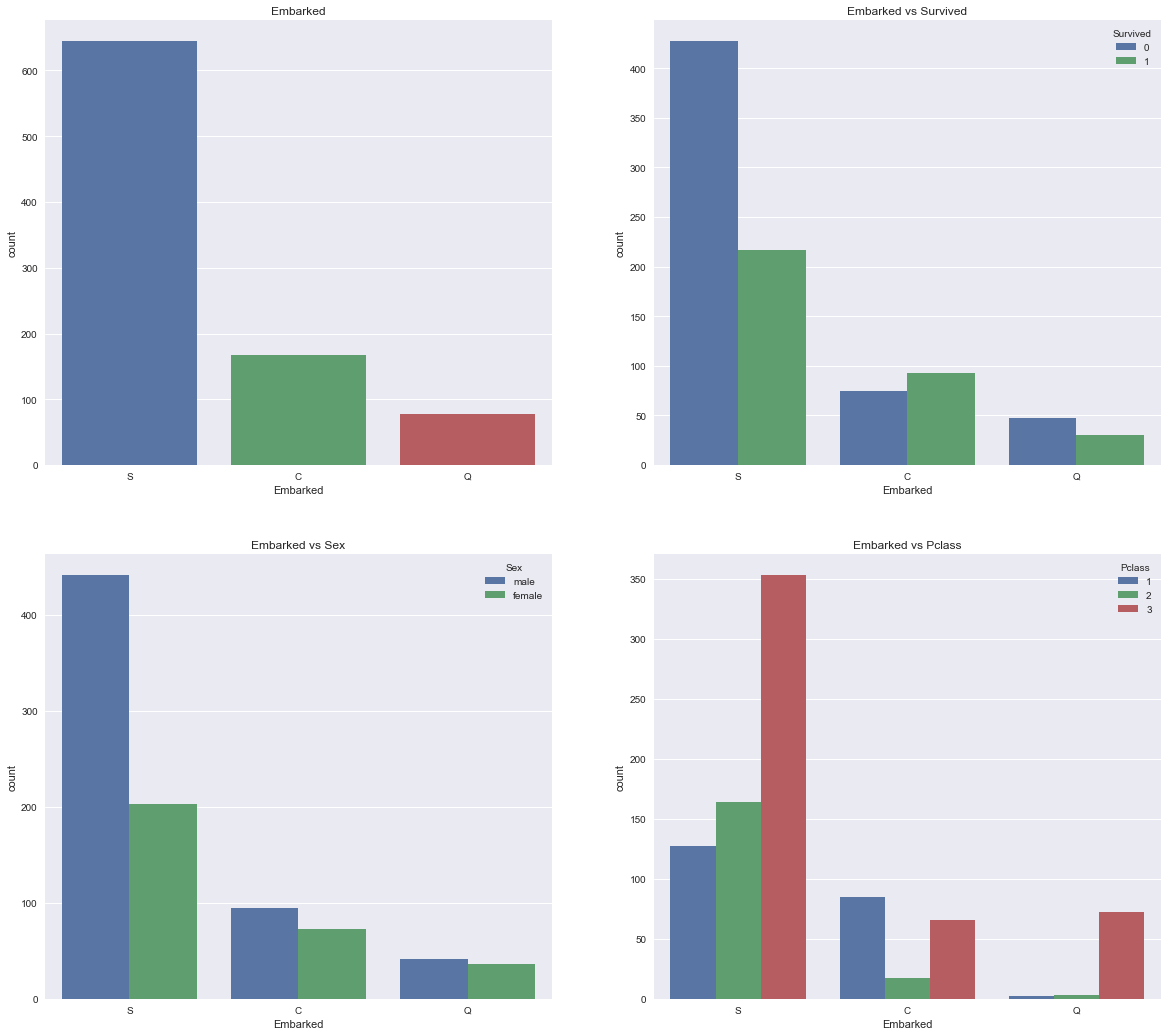

In [30]:
f, ax = plt.subplots(2,2,figsize=(20,18))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[0,1])
ax[0,1].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Sex')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

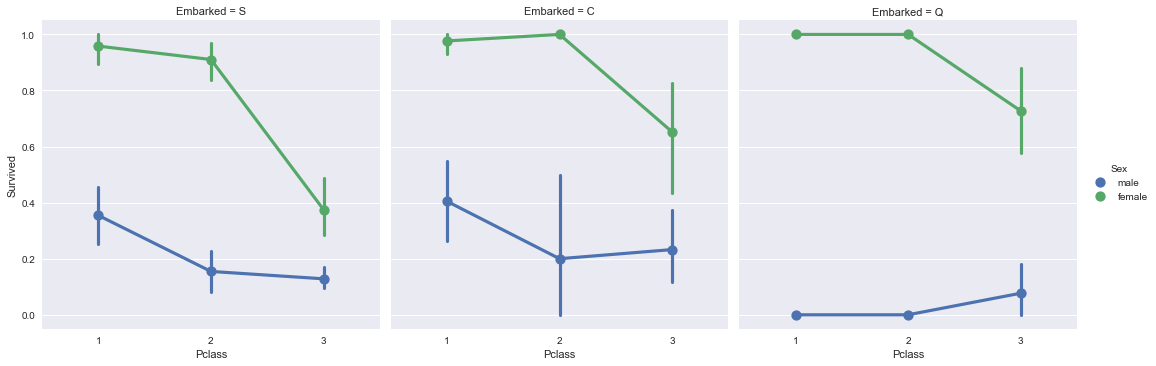

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data, col='Embarked')
plt.show()

In [32]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [33]:
data['Embarked'].fillna('S', inplace=True)

In [34]:
data['Embarked'].isnull().any()

False

In [35]:
pd.crosstab(data['SibSp'], data['Survived'], margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


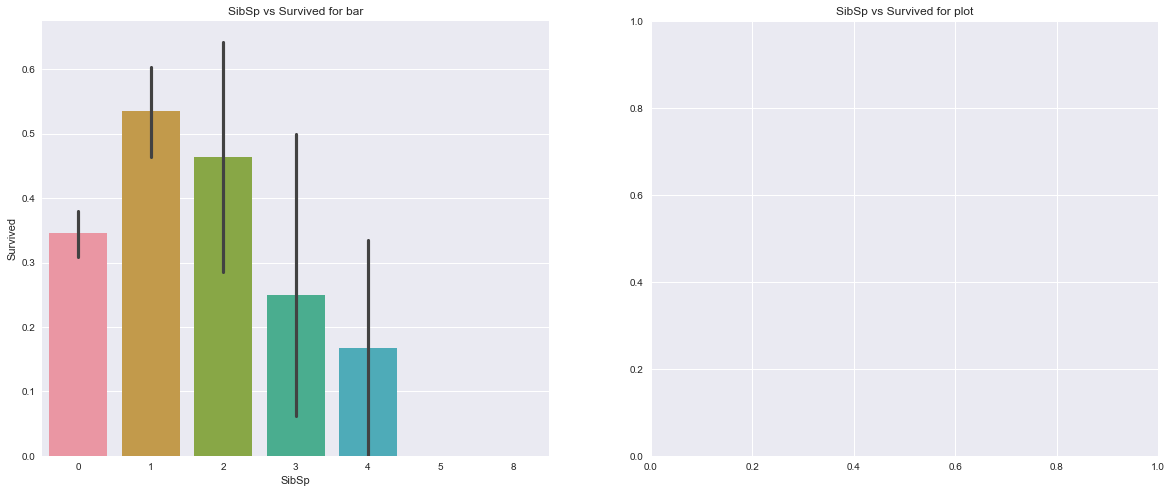

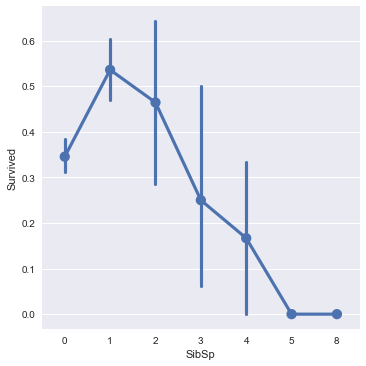

In [36]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived for bar')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived for plot')
plt.show()

In [37]:
pd.crosstab(data['SibSp'], data['Pclass'], margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


In [38]:
pd.crosstab(data['Parch'], data['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


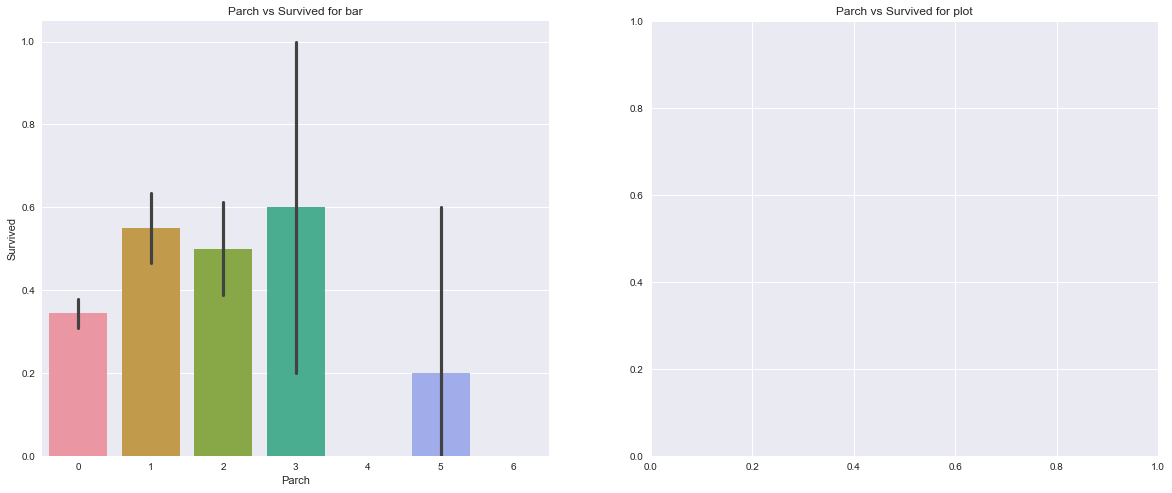

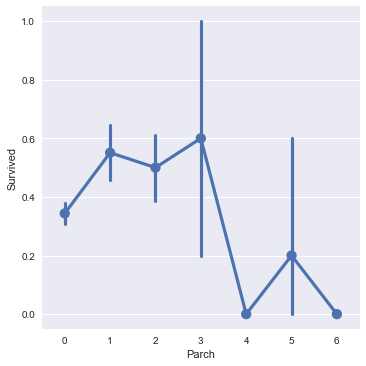

In [39]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data['Parch'], data['Survived'], ax=ax[0])
ax[0].set_title('Parch vs Survived for bar')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived for plot')
plt.close(0)
plt.show()

In [40]:
print('{:>10} {:.2f}'.format('The highest fare is', data['Fare'].max()))
print('{:>10} {:.2f}'.format('The mean fare is', data['Fare'].mean()))
print('{:>10} {:.2f}'.format('The low fare is', data['Fare'].min()))

The highest fare is 512.33
The mean fare is 32.20
The low fare is 0.00


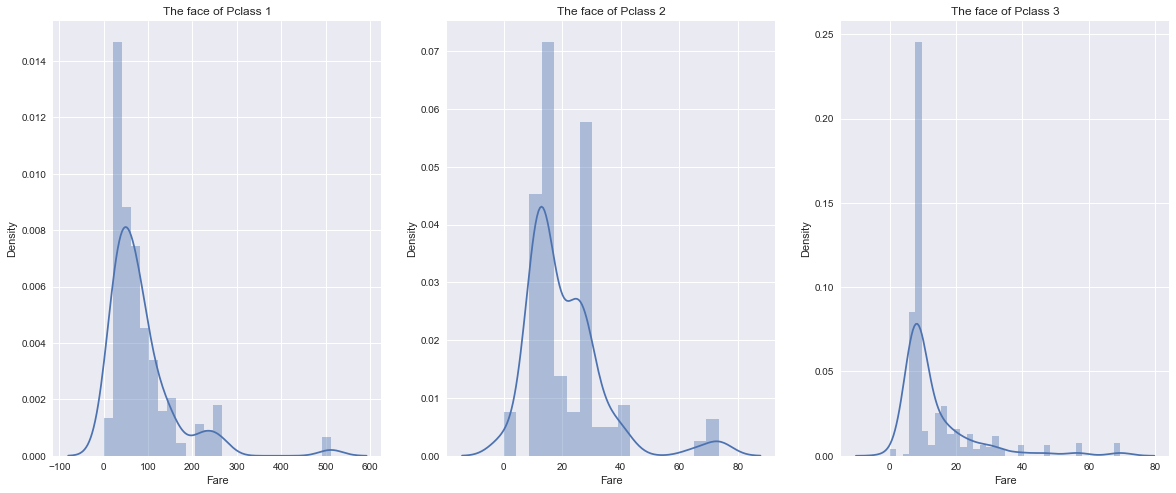

In [41]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title('The face of Pclass 1')
sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
ax[1].set_title('The face of Pclass 2')
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[2].set_title('The face of Pclass 3')
plt.show()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


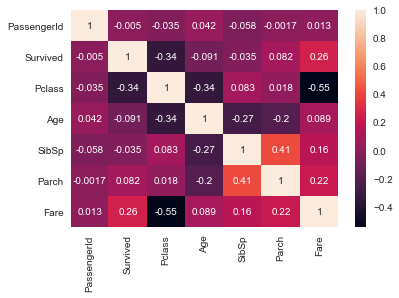

In [42]:
sns.heatmap(data.corr(), annot=True)
data.head()

In [43]:
data['Age band'] = 0
data.loc[data['Age']<=16, 'Age band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age band'] = 3
data.loc[data['Age']>64, 'Age band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [44]:
data['Age band'].value_counts().to_frame()

,Age band
1,382
2,325
0,104
3,69
4,11


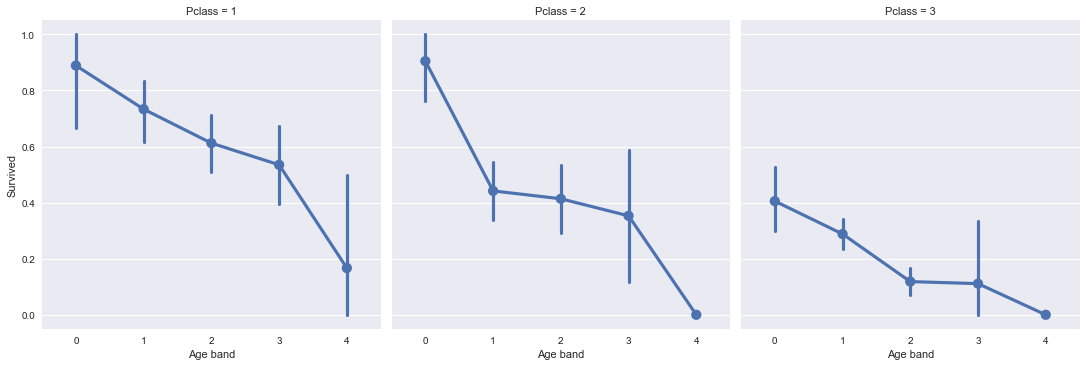

In [45]:
sns.factorplot('Age band', 'Survived', data=data, col='Pclass')
plt.show()

In [46]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

In [47]:
data['Alone'] = 0
data.loc[data['Family_Size']==0, 'Alone'] = 1

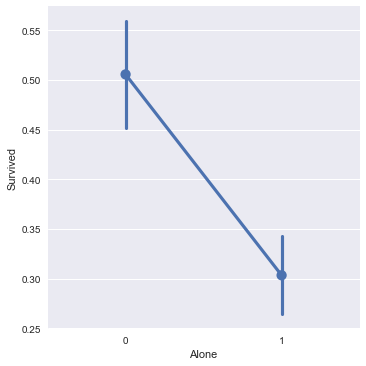

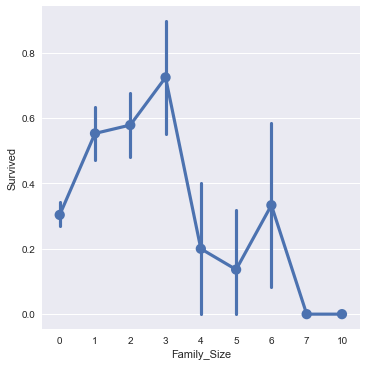

In [48]:
f, ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Alone', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Alone ve Survived')
sns.factorplot('Family_Size', 'Survived', data = data, ax=ax[1])
ax[1].set_title('Family Size ve Survived')
plt.close(0)
plt.close(1)
plt.show()

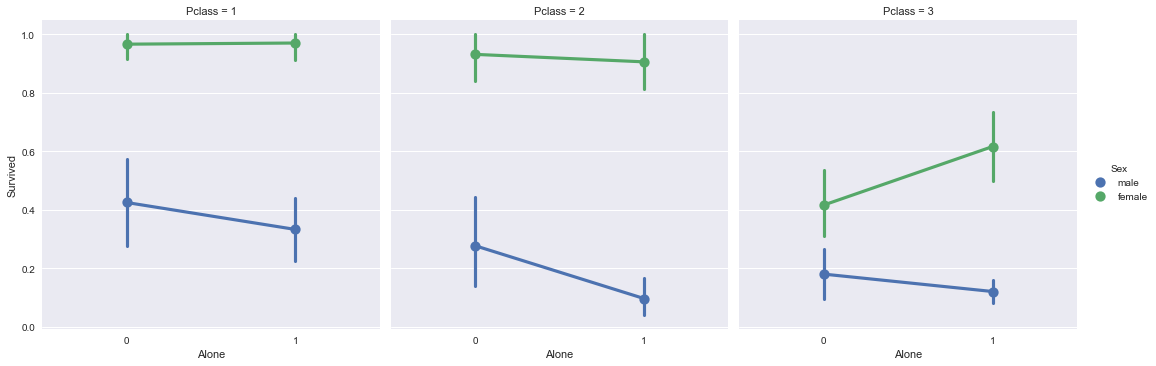

In [49]:
sns.factorplot('Alone', 'Survived', hue='Sex', col = 'Pclass' , data=data)
plt.show()

In [50]:
data['Fare_Range']= pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [51]:
data['Fare_Range'].head(10)

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
5     (7.91, 14.454]
6    (31.0, 512.329]
7     (14.454, 31.0]
8     (7.91, 14.454]
9     (14.454, 31.0]
Name: Fare_Range, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [52]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

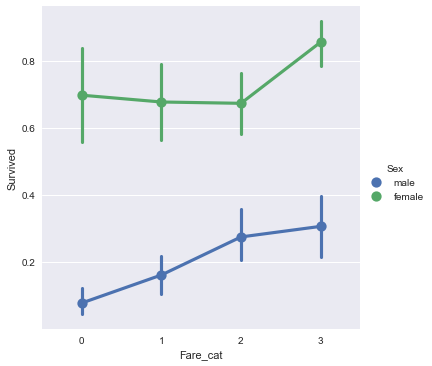

In [53]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [54]:
data['Sex'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
data['Embarked'].replace(['S','C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master', 'Other'], [0,1,2,3,4], inplace=True)

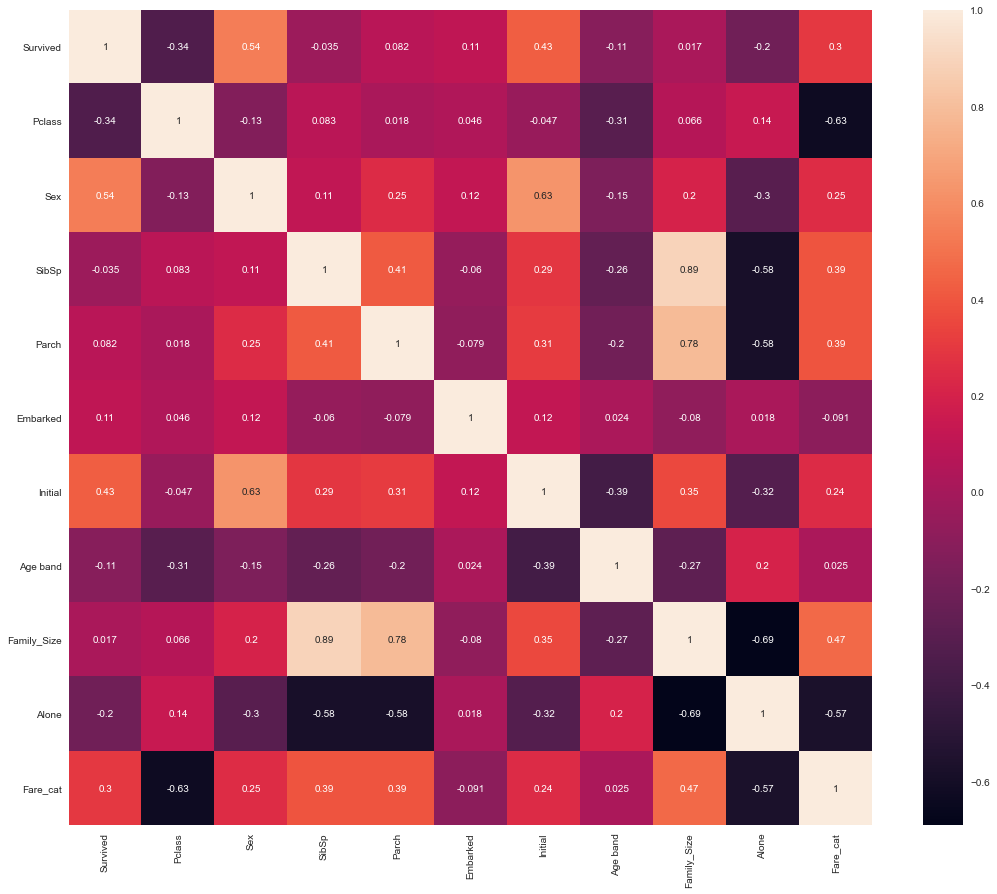

In [55]:
data.drop(['Name', 'Age', 'Ticket' ,'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.show()

In [56]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [57]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# column 0 is the survived label
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X =data[data.columns[1:]]
Y = data['Survived']


In [58]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age band,Family_Size,Alone,Fare_cat
231,3,0,0,0,0,0,1,0,1,0
836,3,0,0,0,0,0,1,0,1,1
639,3,0,1,0,0,0,2,1,0,2
389,2,1,0,0,1,2,1,0,1,1
597,3,0,0,0,0,0,3,0,1,0


In [59]:
model = svm.SVC(kernel='rbf', C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1= model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y)) 

Accuracy for rbf SVM is  0.835820895522388


In [60]:
model = svm.SVC(kernel='linear', C=0.1,gamma=0.1)
model.fit(train_X, train_Y)
prediction2= model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction2, test_Y)) 

Accuracy for rbf SVM is  0.8171641791044776


In [61]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for LogisticRegression is ', metrics.accuracy_score(prediction3, test_Y)) 

Accuracy for LogisticRegression is  0.8134328358208955


In [62]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for DecisionTree classifier is ', metrics.accuracy_score(prediction4, test_Y)) 

Accuracy for DecisionTree classifier is  0.8097014925373134


In [63]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNeighbors classifier is ', metrics.accuracy_score(prediction5, test_Y)) 

Accuracy for KNeighbors classifier is  0.832089552238806


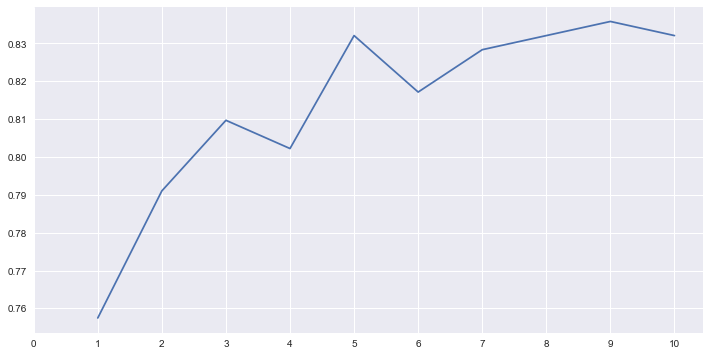

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [64]:
prediction_index = list(range(1,11))
predictions=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    predictions = predictions.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(prediction_index, predictions)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', predictions.values, 'with the max value as ', predictions.values.max())

In [65]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [66]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the RandomForest is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the RandomForest is 0.8134328358208955


## Cross validation

### 1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

### 2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

### 3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

### This is called K-Fold Cross Validation.

### 4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalized model.

In [67]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.806979,0.046718
Naive Bayes,0.795843,0.054861
Random Forest,0.818227,0.046593


<AxesSubplot:>

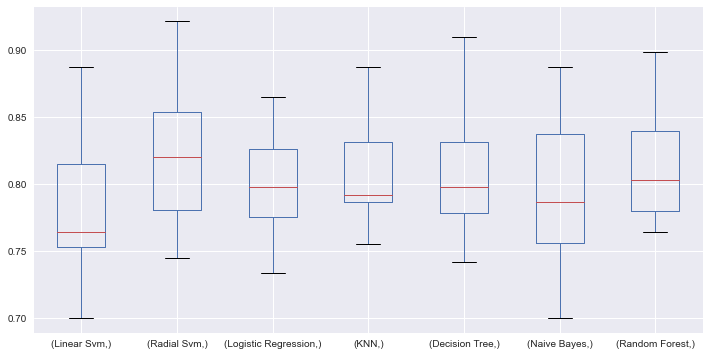

In [68]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

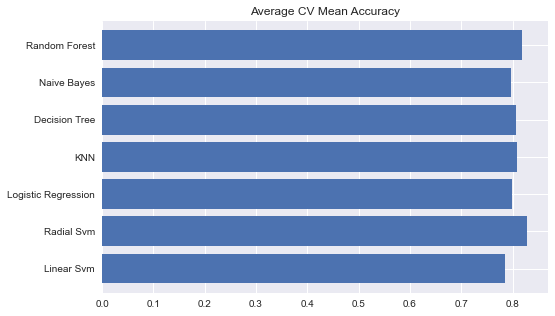

In [69]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

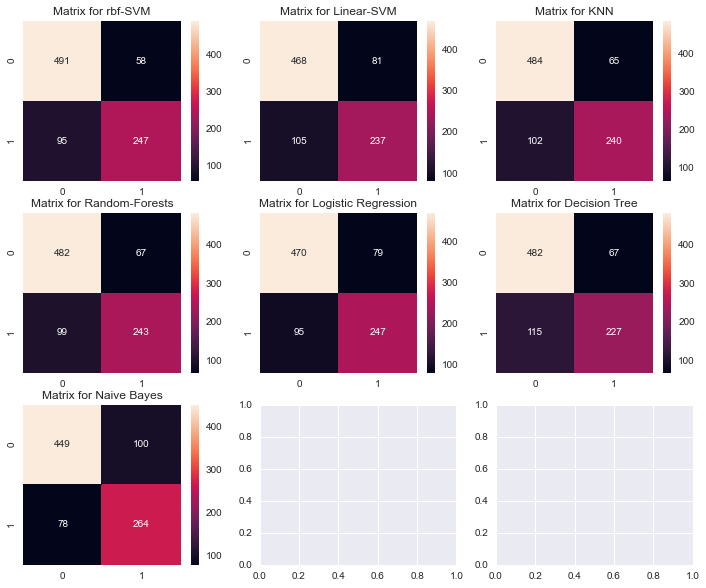

In [70]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [72]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [73]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


In [74]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model_bag.fit(train_X,train_Y)
prediction=model_bag.predict(test_X)
print(prediction.shape)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model_bag,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

(268,)
The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [75]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [76]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [78]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [ ]:
submission = pd.read_csv('./Submission/gender_submission.csv')

In [ ]:
submission.head()

In [ ]:
final_model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
final_model.fit(train_X,train_Y)
test_data = pd.read_csv('./Dataset/test.csv')
data['Initial'] = 0
for i in test_data:
    test_data['Initial'] = test_data.Name.str.extract('([A-Za-z]+)\.')
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Miss'],inplace=True)
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial=='Mr'), 'Age'] = 33
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial=='Mrs'), 'Age'] = 36
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial=='Master'), 'Age'] = 5
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial=='Miss'), 'Age'] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial=='Other'), 'Age'] = 46

test_data['Age band'] = 0
test_data.loc[test_data['Age']<=16, 'Age band'] = 0
test_data.loc[(test_data['Age']>16) & (test_data['Age']<=32), 'Age band'] = 1
test_data.loc[(test_data['Age']>32) & (test_data['Age']<=48), 'Age band'] = 2
test_data.loc[(test_data['Age']>48) & (test_data['Age']<=64), 'Age band'] = 3
test_data.loc[test_data['Age']>64, 'Age band'] = 4

test_data['Family_Size'] = 0
test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp']
test_data['Alone'] = 0
test_data.loc[test_data['Family_Size']==0, 'Alone'] = 1
test_data['Fare_cat'] = 0
test_data.loc[test_data['Fare']<=7.91, 'Fare_cat'] = 0
test_data.loc[(test_data['Fare']>7.91) & (test_data['Fare'] <= 14.454), 'Fare_cat'] = 1
test_data.loc[(test_data['Fare']>14.454) & (test_data['Fare'] <= 31), 'Fare_cat'] = 2
test_data.loc[(test_data['Fare']>31) & (test_data['Fare'] <= 513), 'Fare_cat'] = 3
test_data['Sex'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
test_data['Embarked'].replace(['S','C', 'Q'], [0,1,2], inplace=True)
test_data['Initial'].replace(['Mr','Mrs','Miss','Master', 'Other'], [0,1,2,3,4], inplace=True)
test_data.drop(['Name', 'Age', 'Ticket' ,'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_data.head()

In [ ]:
test_data.isnull().any()

In [ ]:
test_data['Initial']

In [ ]:
train_X.head()

In [ ]:
prediction = final_model.predict(test_data)
submission['Survived'] = prediction
submission.to_csv('./Submission/first_submission.csv', index=False)